In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def p(z):
    return z**3 - 1
def pp(z):
    return 3*z**2

In [3]:
def iterate(z_n, h=1):
    return z_n - h*p(z_n)/pp(z_n)

We now construct $S$.
$z^3 < 0$ implies $\arg(z)\in\{\pi/3, \pi, 5\pi/3\}$

In [4]:
angles = [np.pi/3, np.pi, np.pi  * 5/3]
moduli = np.linspace(0.01, 10)
S = [[r * np.exp(1j * theta) for theta in angles] for r in moduli]
S = np.array(S).flatten()

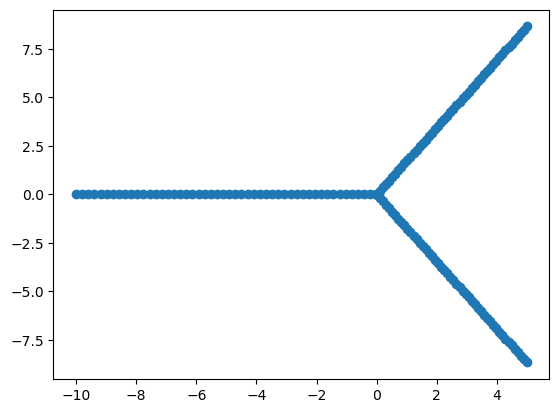

In [5]:
plt.scatter(np.real(S), np.imag(S))

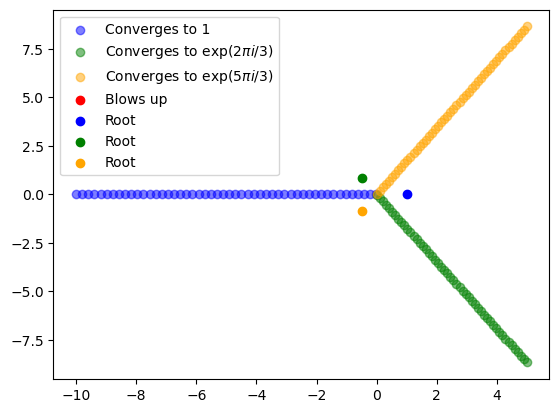

In [37]:
roots = [1, np.exp(1j * 2/3 * np.pi),  np.exp(1j * 4/3 * np.pi)]
l0 = list()
l1 = list()
l2 = list()
lb = list()

for z in S:
    zn = z
    while np.abs(p(zn)) > 1e-5 and np.abs(p(zn)) < 1e20:
        zn = iterate(zn)
    if (np.abs(p(zn)) > 1e20):
        lb.append(z)
    else:
        dist = np.abs(roots - zn)
        if dist[0] == np.min(dist):
            l0.append(z)
        elif dist[1] == np.min(dist):
            l1.append(z)
        elif dist[2] == np.min(dist):
            l2.append(z)

plt.scatter(np.real(l0), np.imag(l0), label="Converges to 1", color='b', alpha=0.5)
plt.scatter(np.real(l1), np.imag(l1), label="Converges to $\exp({2\pi i}/{3})$", color='g', alpha=0.5)
plt.scatter(np.real(l2), np.imag(l2), label="Converges to $\exp({{5\pi i}/{3}})$", color='orange', alpha=0.5)
plt.scatter(np.real(lb), np.imag(lb), label="Blows up", color='r')
for i in range(3):
    plt.scatter(roots[i].real, roots[i].imag, label="Root", color=['b', 'g', 'orange'][i])
plt.legend()